In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


In [15]:
data = pd.read_csv('/Users/macbookpro/Desktop/TerraSafe/Machine Learning/noaa_ml.csv')


In [16]:
data['clase_sismo'] = pd.qcut(data['magnitudSismo'], q=5, labels=['Muy Leve', 'Leve', 'Medio', "Fuerte", "Muy Fuerte"])
data

,nombreUbicacion,latitud,longitud,magnitudSismo,tsunami,volcan,pais,profundidadSismo,intensidad,fecha,...,ordenCantidadMuertesActualizadas,lesionesActualizadas,ordenCantidadLesionesActualizadas,casasDanadasActualizadas,ordenCantidadCasasDanadasActualizadas,casasDestruidasActualizadas,ordenCantidadCasasDestruidasActualizadas,danosActualizados,ordenCantidadDanosActualizados,clase_sismo
0,JAPAN: UCHIURA BAY,42.070,140.680,6.5,1,1,JAPAN,40.153361,7.856559,1640-07-31,...,3.0,1.0,1.0,1.0,3.0,20.0,1.0,0.5,1.0,Medio
1,JAPAN: NEAR S COAST HONSHU: KOZU-SHIMA,34.221,139.131,6.1,1,1,JAPAN,10.000000,7.856559,2000-07-01,...,1.0,101.0,3.0,1.0,3.0,101.0,3.0,0.5,1.0,Leve
2,RWANDA: RUBAVU; CONGO,-1.601,29.400,4.7,0,1,RWANDA,10.000000,7.000000,2021-05-25,...,1.0,1.0,1.0,1.0,1.0,5000.0,4.0,5.0,3.0,Muy Leve
3,CHINA: SHAANXI PROVINCE,35.600,110.900,5.4,0,0,CHINA,40.153361,7.000000,1959-08-10,...,1.0,1.0,1.0,1.0,3.0,43.0,1.0,0.5,1.0,Muy Leve
4,"PERU: CAMANA, AREQUIPA",-16.660,-72.662,6.8,0,0,PERU,87.000000,6.000000,1999-04-03,...,1.0,50.0,1.0,300.0,3.0,101.0,3.0,1.0,2.0,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,PERU,-16.300,-71.000,8.0,0,0,PERU,25.000000,9.000000,1471-00-00,...,1.0,1.0,1.0,1.0,3.0,101.0,3.0,1.0,2.0,Muy Fuerte
4582,"INDONESIA: JAVA: LABUHAN, MENES, PONOROGO",-6.400,105.400,6.6,1,0,INDONESIA,64.000000,7.856559,1963-12-16,...,1.0,1.0,1.0,1.0,1.0,101.0,3.0,0.5,1.0,Medio
4583,CHINA: TIBET (XIZANG PROVINCE),29.807,90.350,6.3,0,0,CHINA,12.000000,7.856559,2008-10-06,...,1.0,19.0,1.0,1.0,3.0,101.0,3.0,1.0,2.0,Medio
4584,PERU,-12.200,-77.600,7.8,0,0,PERU,30.000000,7.000000,1582-08-15,...,1.0,1.0,1.0,1.0,3.0,101.0,3.0,1.0,2.0,Muy Fuerte


In [17]:
# Supongamos que tienes un DataFrame llamado 'data' que contiene tus datos de sismos

# Divide los datos en características (X) y etiquetas/clases (y)
X = data[['magnitudSismo','profundidadSismo','intensidad','ordenCantidadMuertesActualizadas','ordenCantidadCasasDestruidasActualizadas']]
y = data['clase_sismo']  # Reemplaza 'etiqueta_de_clase' con la columna que contiene las etiquetas/clases de los sismos


In [18]:
#Configura el número de centros para los nodos ocultos:
n_centers = 10


In [19]:
#Crea el pipeline para el modelo RBF:
model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=n_centers),
    RidgeClassifier()
)


In [20]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Entrena el modelo:
model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=10)),
                ('ridgeclassifier', RidgeClassifier())])

In [22]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.5206971677559913


INFORME DE CLASIFICACION 

In [31]:
from sklearn.metrics import classification_report

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Fuerte       0.43      0.69      0.53       200
        Leve       0.56      0.22      0.31       167
       Medio       0.51      0.29      0.37       181
  Muy Fuerte       0.46      0.31      0.37       167
    Muy Leve       0.62      0.99      0.76       203

    accuracy                           0.52       918
   macro avg       0.52      0.50      0.47       918
weighted avg       0.52      0.52      0.48       918



MATRIZ DE CONFUSION 

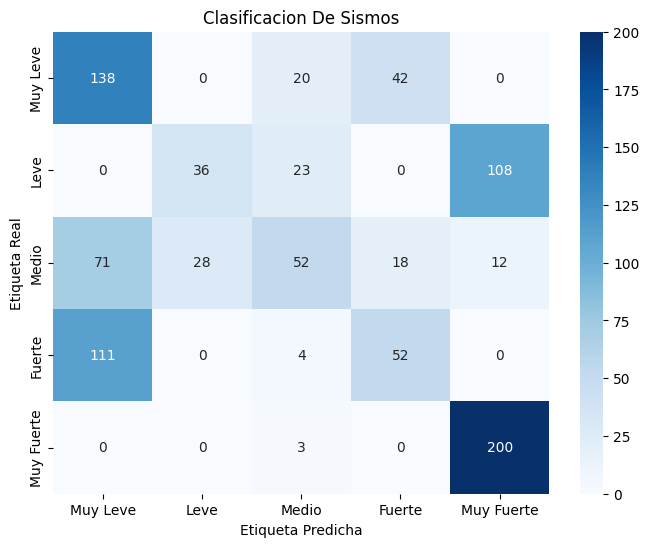

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels = ['Muy Leve', 'Leve', 'Medio', "Fuerte", "Muy Fuerte"] , yticklabels =['Muy Leve', 'Leve', 'Medio', "Fuerte", "Muy Fuerte"])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Clasificacion De Sismos')
plt.show()


Curva ROC (Receiver Operating Characteristic)

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calcular las tasas de verdaderos positivos (TPR) y falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
